In [2]:
################################################################
#MultilayerPerceptron as classifier
#Author: Edwyn Javier Aldana
################################################################

#Load libraries
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import svm
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd


Load Dataset

Saving clientes3.csv to clientes3.csv
(300, 3)


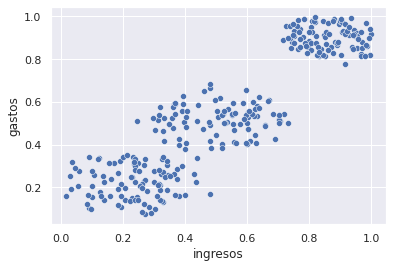

In [4]:
######################################################
#Uncomment the block online or local depending your
#execution environment
######################################################
#Online
from google.colab import files
uploaded = files.upload()
import io
dataset = pd.read_csv(io.BytesIO(uploaded['clientes3.csv']),sep=",", header='infer')
 

#Describe shape of the dataset
print(dataset.shape)
#View some statistics
dataset.head()

#Optional: Visualize data
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="ingresos", y="gastos", data=dataset)


Define predictors and response variables

In [ ]:
#Define the predictor and the output variable.
#This task depends on several assumptions based on experience, for instance, 
X = dataset.loc[:, 'ingresos':'gastos'] 
y = dataset['Clase'].values.reshape(-1,1) # Unknown rows, one column


#Optional: Usually when the number of clases is >27 you have to encoded the classes
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(y)
onehotlabels = enc.transform(y).toarray()
onehotlabels.shape
print(onehotlabels)
y=onehotlabels


[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1.

Define training and test datasets

In [ ]:
#Define the sizes of training set and test dataset, applying 80-20 criterion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



Training Process

In [ ]:
#Train the model


#With MLP
 #‘lbfgs’ is an optimizer in the family of quasi-Newton methods (Limited-memory 
 # BFGS (L-BFGS or LM-BFGS)).
 #‘sgd’ refers to stochastic gradient descent. (More efficient)
 #‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba


classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
             hidden_layer_sizes=(10,5,2), random_state=1)
classifier.fit(X_train, y_train) #training the algorithm



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Testing Process

In [ ]:

#Make prediction based on the model using the test data
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_pred= classifier.predict(X_test)

import numpy as np

#DECODE
y_pred=enc.inverse_transform(np.reshape(y_pred, (-1,3)))
y_test=enc.inverse_transform(np.reshape(y_test, (-1,3)))

cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy MLPN:",metrics.accuracy_score(y_test, y_pred))



[[11  0  0]
 [ 1  7  0]
 [ 0  0  1]]
Accuracy MLPN: 0.95
